# HEART DISEASE PREDICTION USING MACHINE LEARNING

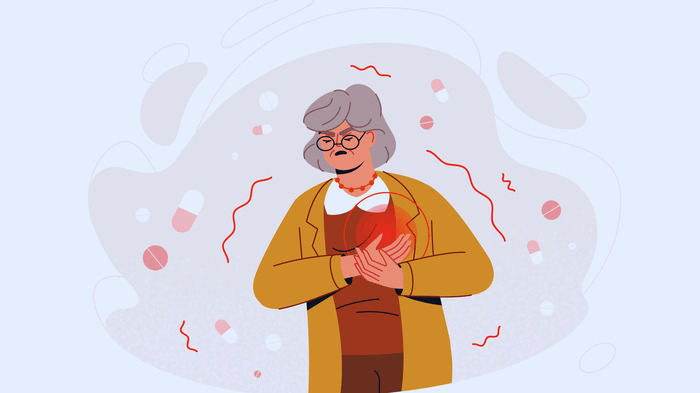

### Project Objective

#### Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

In [1]:
# Multiple Model Test: Best Model Save (Best Score)   

## Step 1: Import Important Modules

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded successfully..!!')

All Modules Loaded successfully..!!


## Step 2: Loading Data

In [3]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


## Step 3: Understaning data using EDA

In [4]:
# 3.1 Data head
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
# 3.2 Data tail
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [6]:
# 3.3 Data shape
df.shape 

(303, 14)

In [7]:
# 3.4 Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# 3.5 Df Columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [9]:
# Domain Knowledge is required for this level of project

###### 3.7: Checking Null Counts

In [10]:
df.isna().sum()
# no null values found
# In case of null: remove, fill, replace, drop

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8: Column Stats

In [11]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

###### 3.9: Each column univariate analysis

In [12]:
for i in df:
    print(f'columns_{i}',df[i].unique())
    print('====================',end = '\n\n')

columns_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

columns_sex [1 0]

columns_cp [3 2 1 0]

columns_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

columns_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 

###### 3.10 each numerical feature Hist plot distribution

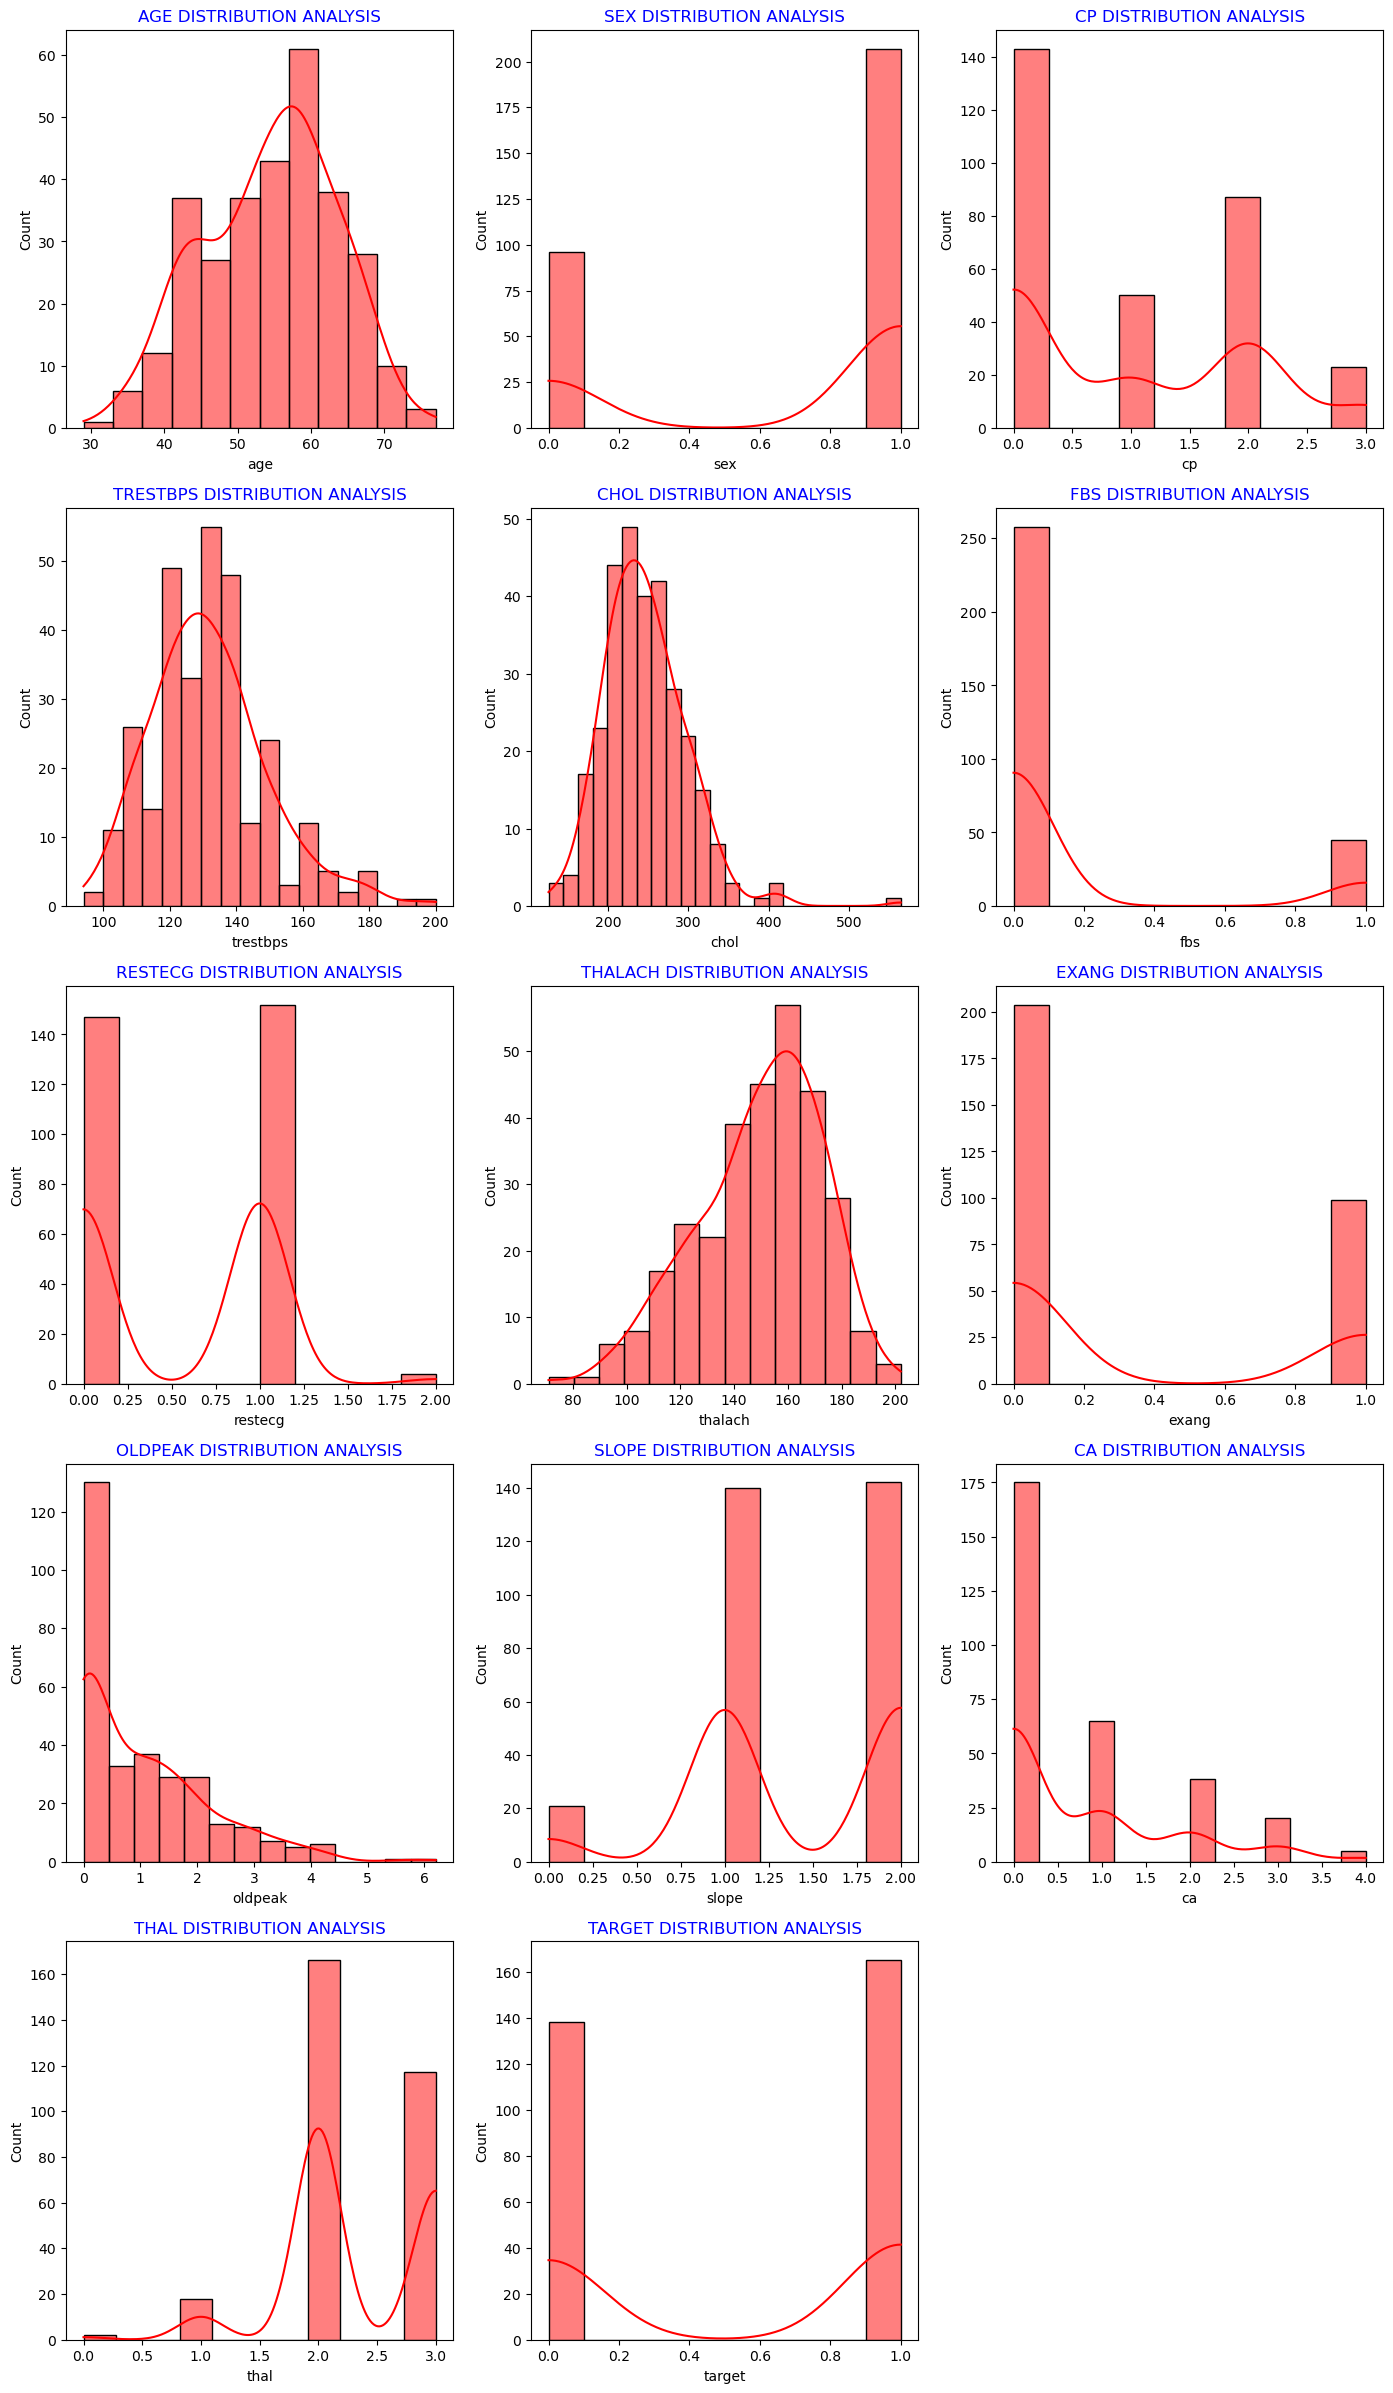

In [13]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis'.upper(), color = 'blue')
    sns.histplot(df[j], kde = True, color = 'r')
plt.savefig('All Numerical Feature Analysis.jpeg',dpi = 500)
plt.show()

In [14]:
# Target col not that much imbalance, we can proceed, if imbalance found we need to balance using sampling

###### 3.11: Bivariate Analysis, To check correlation of features vs target

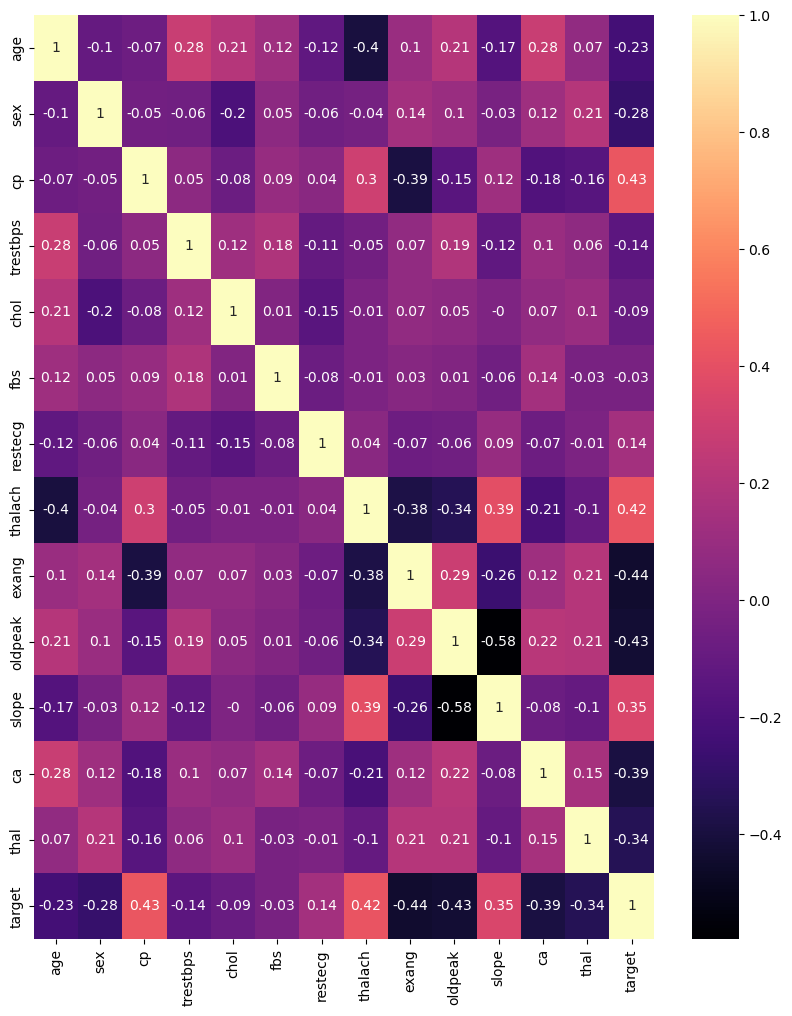

In [15]:
plt.figure(figsize = (10,12))
sns.heatmap(df.corr().round(2),cmap = 'magma', annot = True)
plt.show()

In [16]:
df.corr()['target'].sort_values(ascending = False).reset_index()

index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

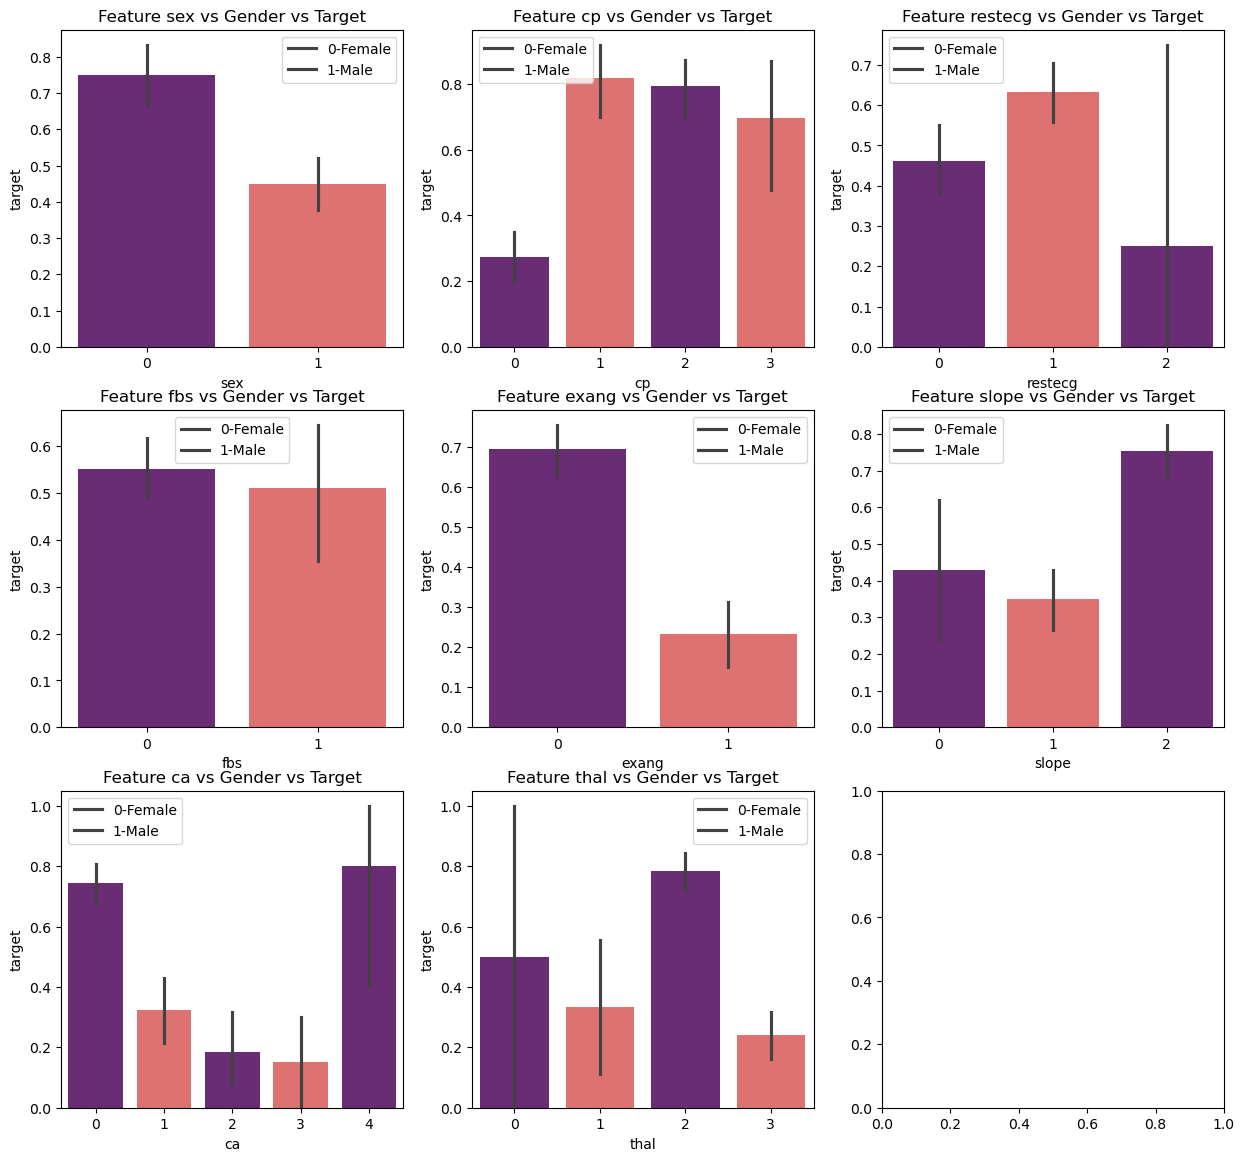

In [17]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('magma',2))
        plt.legend(['0-Female','1-Male'])
    except:
        ...


plt.show()


###### 3.13 Pairplot feature vs Target

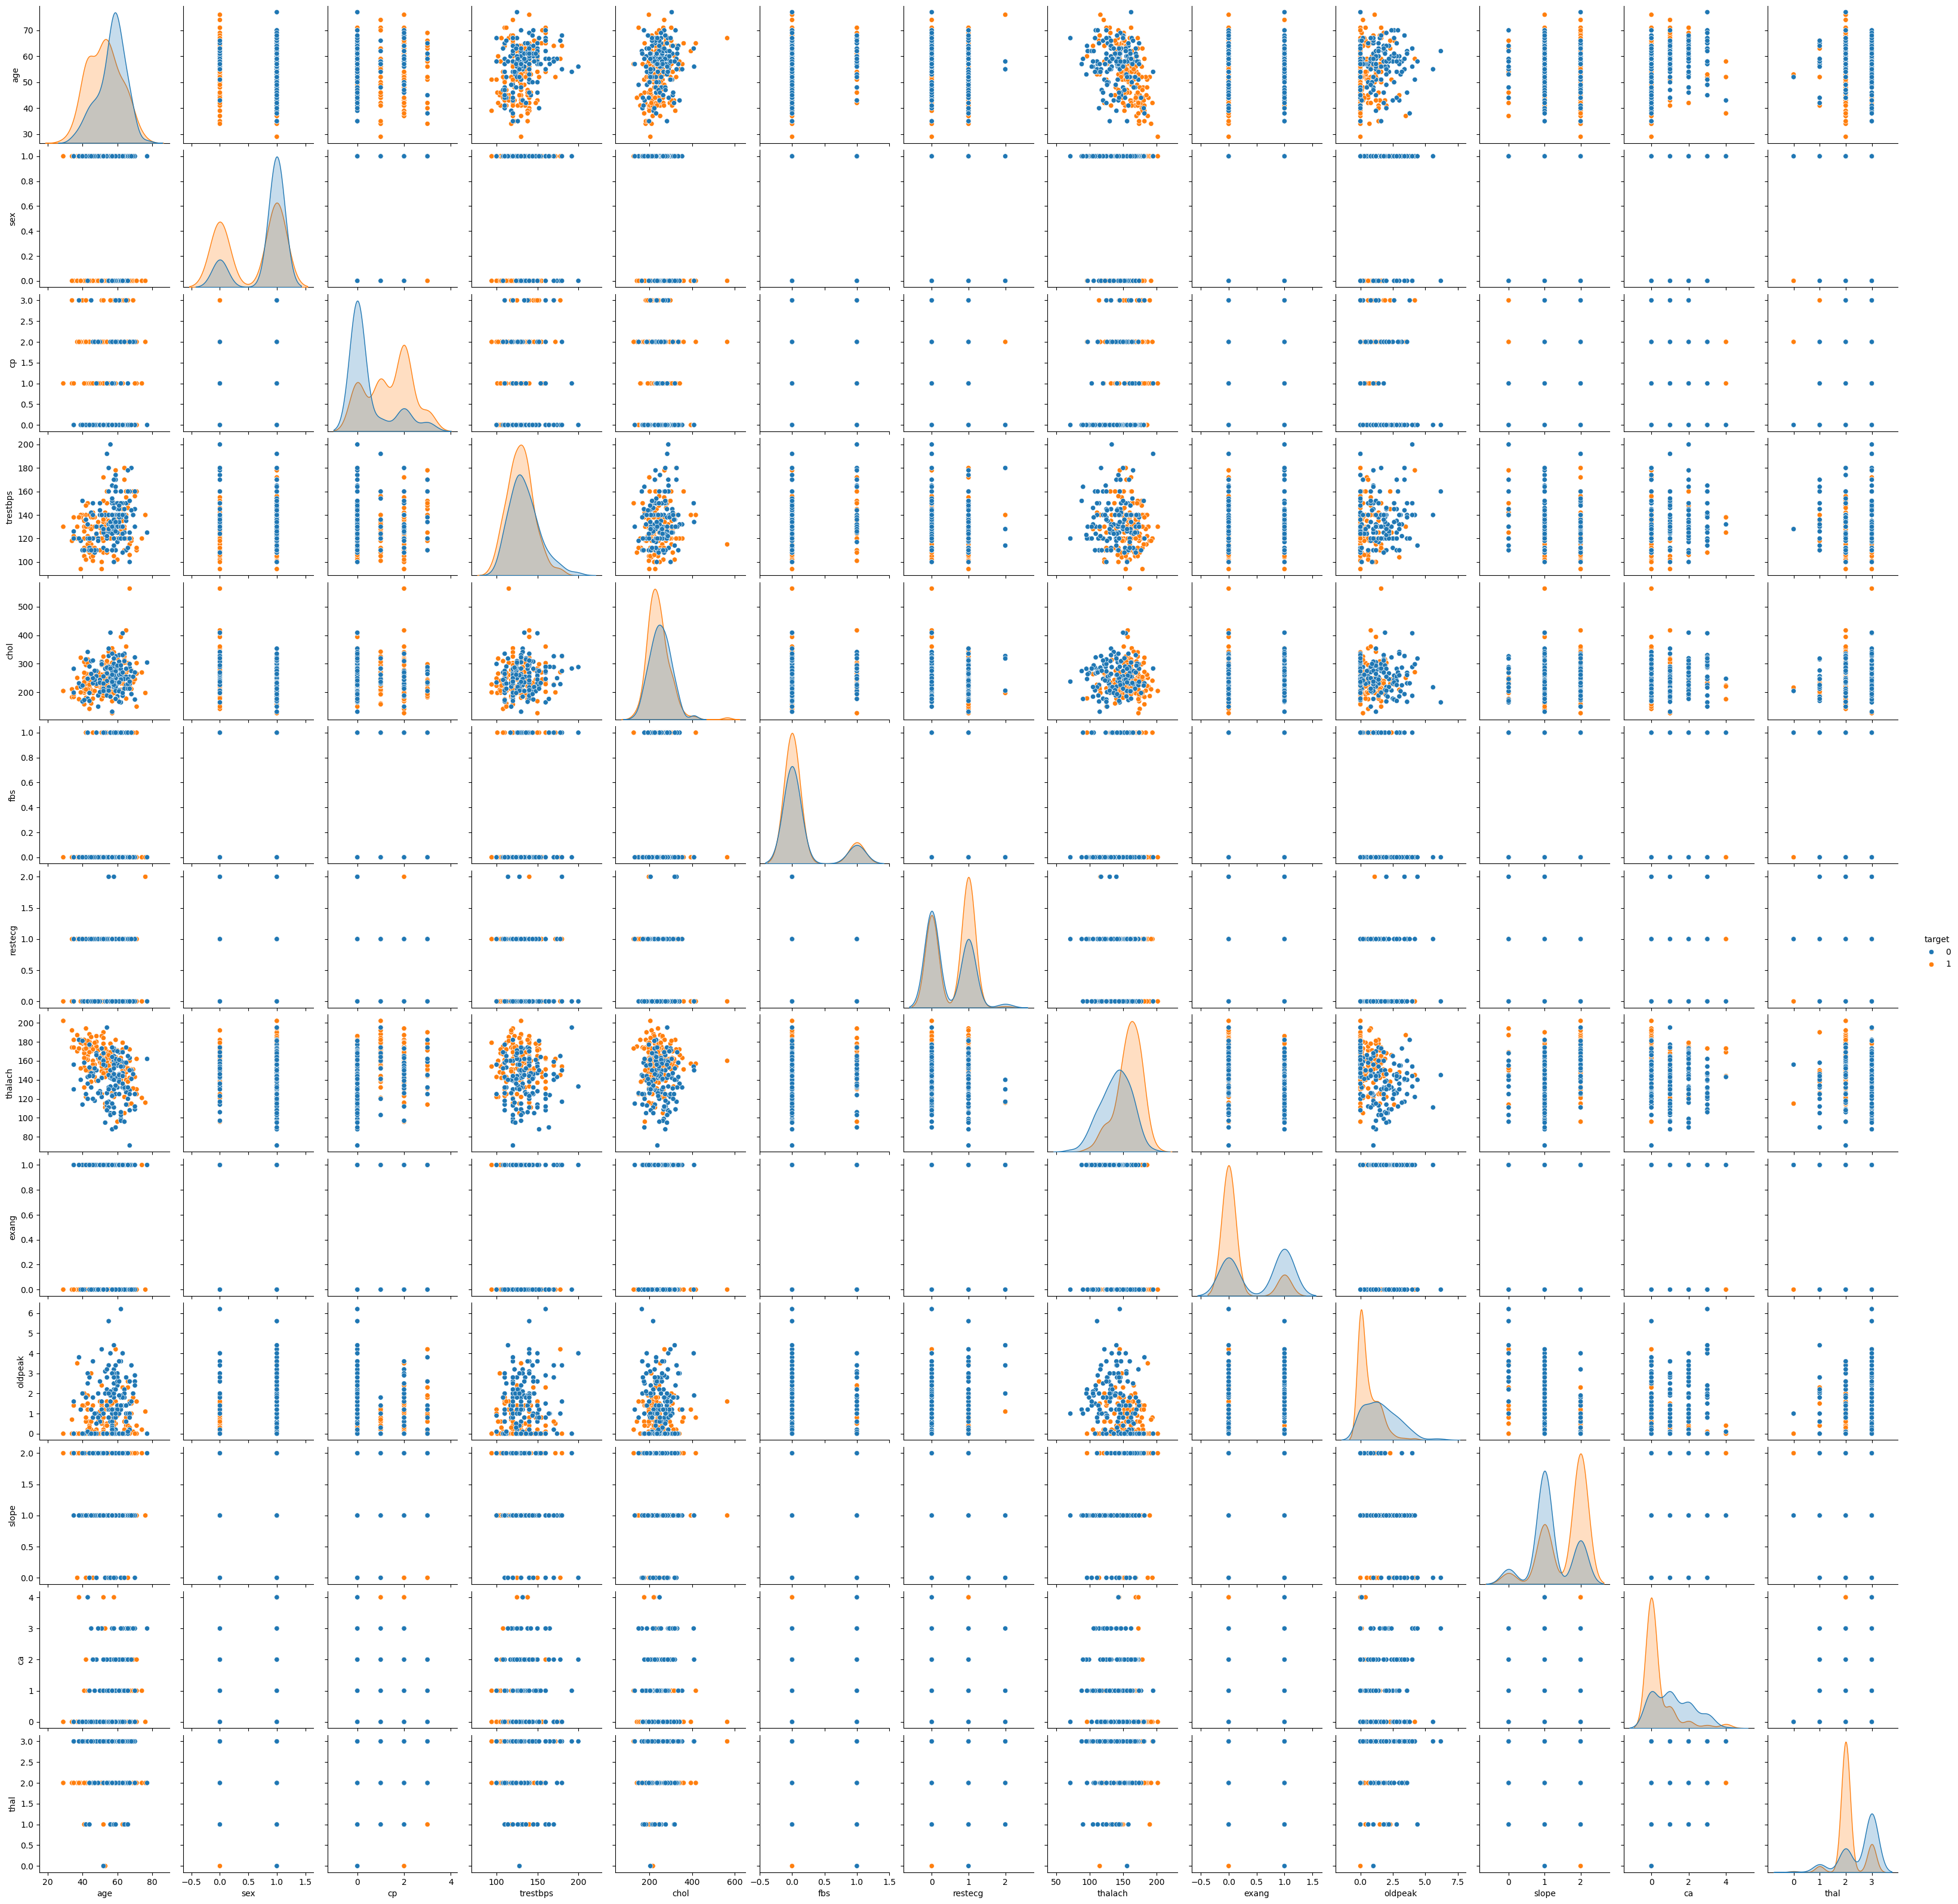

In [18]:
sns.pairplot(data = df,hue = 'target')
plt.show()

## Step 4: Divide Data into Train and Test

###### Train Test split

In [19]:
# 4.1 Divide data into Target and Features

X = df.iloc[:,:-1]
y = df['target']


In [20]:
X.shape, y.shape

((303, 13), (303,))

###### 4.2 Train - test Split

In [21]:
# 4.2 Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## Step 5: Multi Model Creation 

In [23]:
# because of target values: only 0,1(Binary classification),
# This is not regression problem

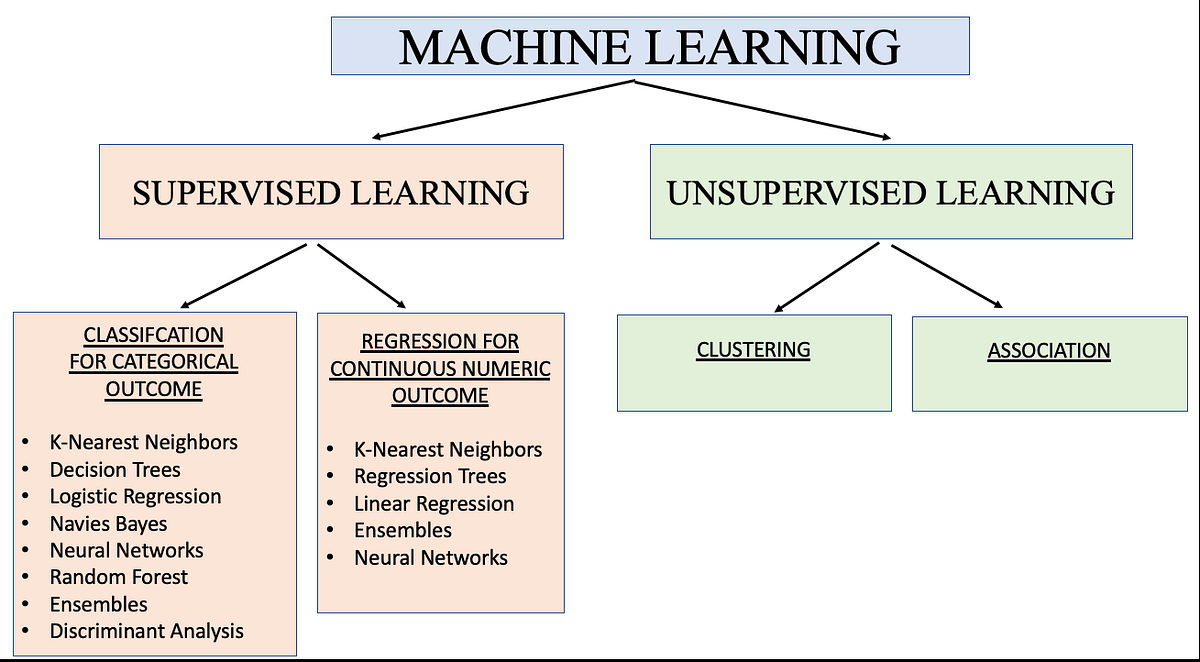

#### Step 5.1: Logistic Regression Model

In [24]:
# It uses the concept of sigmotic Func: Linear Points converts to sigmoid(s) Curve 

In [25]:
# yPred = mx+c

In [26]:
# z = y_pred
# y_pred = Linear Regression
# Sigmoid function convert Linear line to curve 
# logistics regression

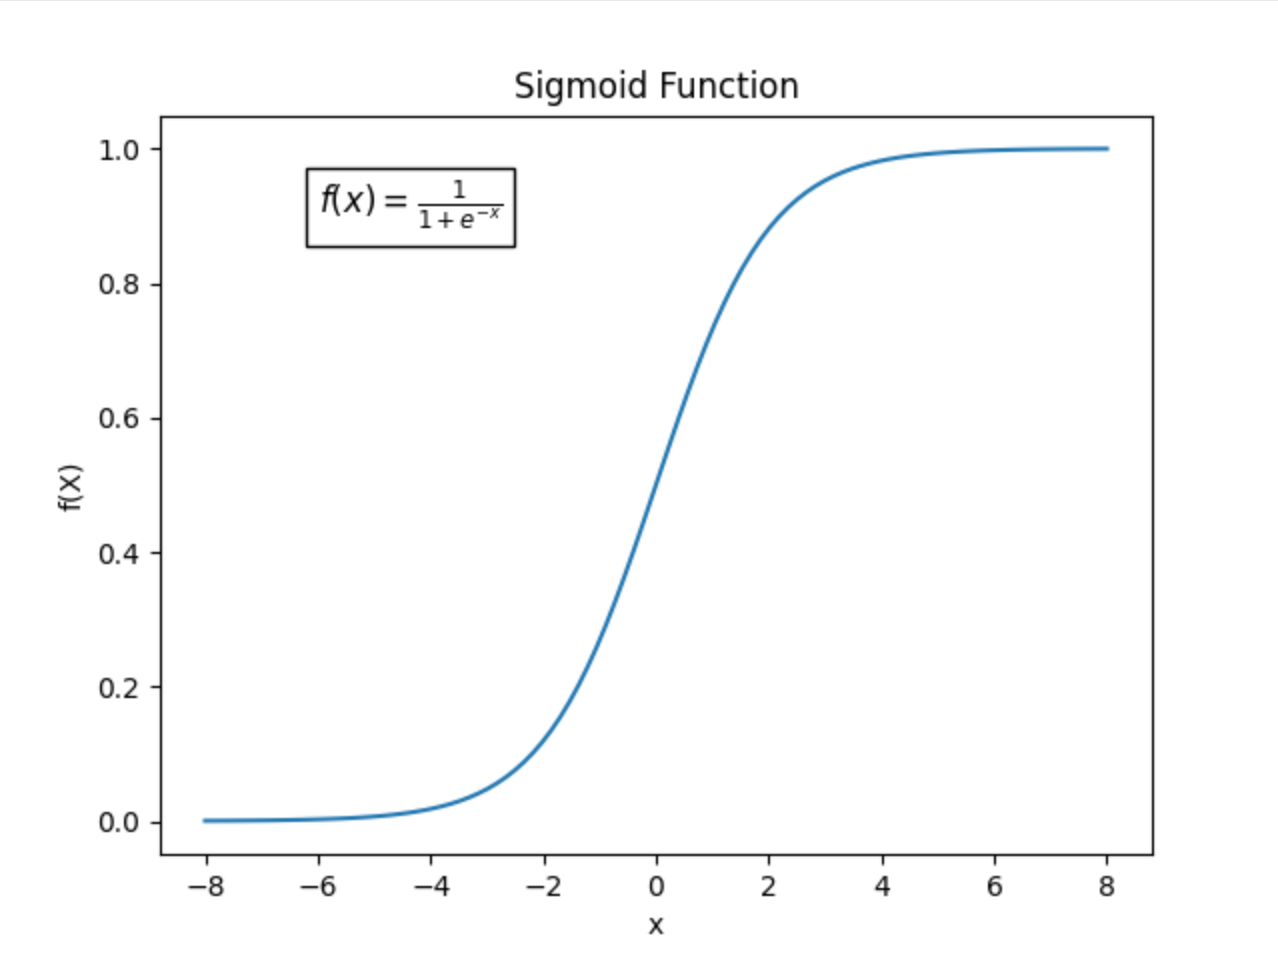

In [27]:
#Step 5.1.1 Import Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)

LogisticRegression()

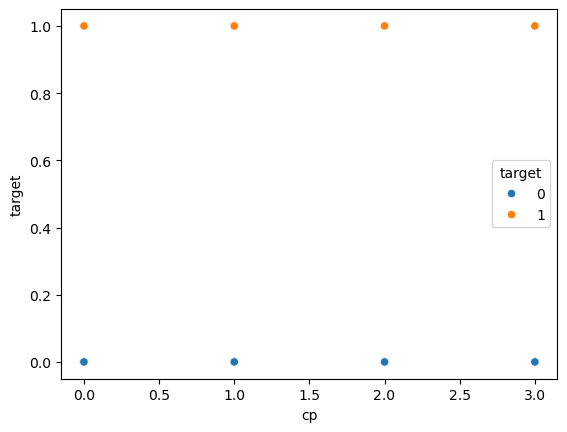

In [29]:
sns.scatterplot(data = df,x = 'cp', y = 'target', hue = 'target')
plt.show()

In [30]:
y_pred = model_lr.predict(X_test)
# y_pred

In [31]:
# 5.1.2: Important model evaluation mmetrics 
# It will be called only when problem is classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [32]:
# 5.1.3: Import Confusion Matrix to Evaluate Classification
from sklearn.metrics import confusion_matrix

In [33]:
# Error comparison: if Scores tie 
# Type1, type2: Type1 error is dangerous

In [34]:
cm = confusion_matrix(y_test,y_pred)

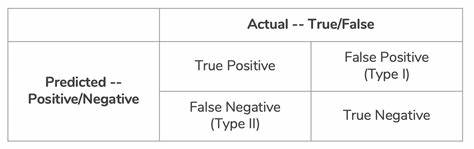width=500

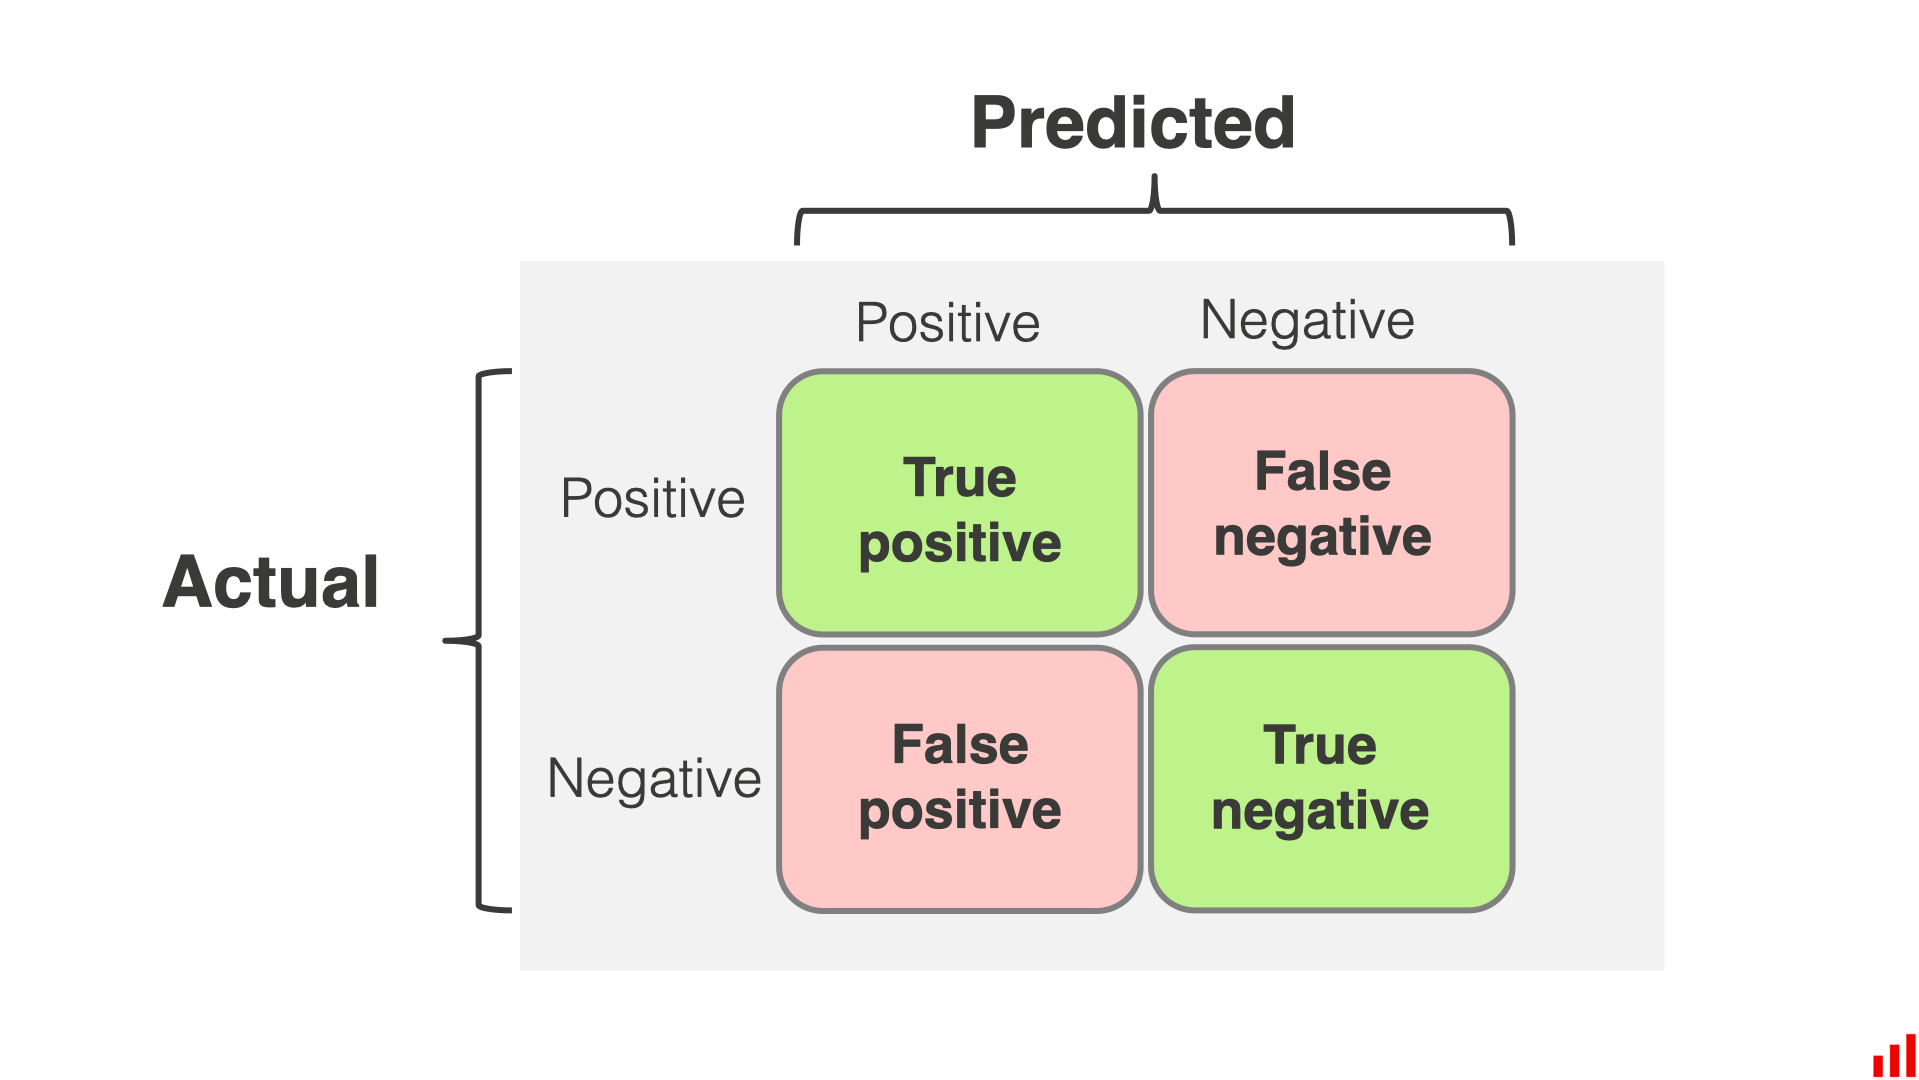

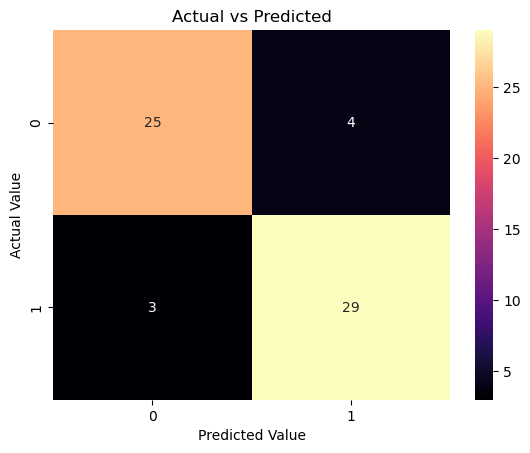

In [35]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='magma')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [36]:
cm

array([[25,  4],
       [ 3, 29]])

In [37]:
cm.ravel()

array([25,  4,  3, 29])

In [38]:
TN,FP,FN,TP = cm.ravel()

In [39]:
precision_score(y_test,y_pred)

0.8787878787878788

In [40]:

ps = TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [41]:
acs = (TP+TN)/cm.sum()
acs

np.float64(0.8852459016393442)

In [42]:
print(accuracy_score(y_test,y_pred))
 

0.8852459016393442


In [43]:
lr_score = accuracy_score(y_test,y_pred)
lr_score

0.8852459016393442

In [44]:
rs = recall_score(y_test,y_pred)
print('Recall Score is: ', rs)    

Recall Score is:  0.90625


In [45]:
# F1 Score to Evaluate both Precision Recall Score

In [46]:
f1_sc = f1_score(y_test,y_pred)

In [47]:
print('F1 Score: ',f1_sc)

F1 Score:  0.8923076923076924


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [49]:
#5.1.4: Checking Model Score
# Model Score same as accuracy Score
model_lr.score(X_test,y_test)

0.8852459016393442

#### 5.2 Naive Bays ML Model

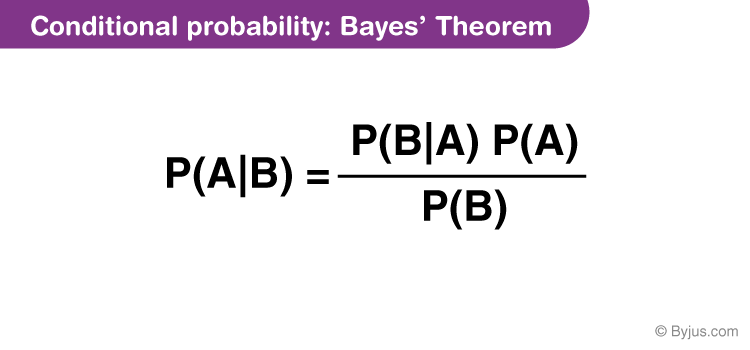


###### 5.2.1 Import.naive Model

In [50]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNB: only be use in case of multi class classification

model_nv = GaussianNB()

model_nv.fit(X_train,y_train) #train part / learning

GaussianNB()

In [51]:
 y_pred = model_nv.predict(X_test)

In [52]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score: ',nv_score)

Naive Bayes Score:  0.8688524590163934


In [53]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8688524590163934
Precision Score:  0.9
Recall Score:  0.84375
F1 Score:  0.8709677419354839


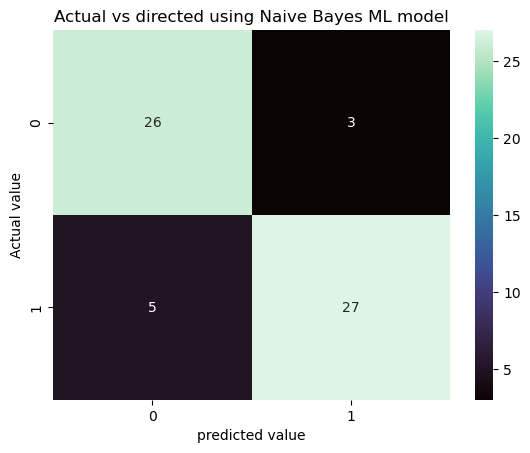

In [54]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs directed using Naive Bayes ML model')
sns.heatmap(cm,annot =True,cmap='mako')
plt.xlabel('predicted value')
plt.ylabel('Actual value')
plt.show()

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [56]:
# Model1>Y_pred>Scores>confusionMatrix>classification_report
# Model2>Y_pred>Scores>confusionMatrix>classification_report
# Model3>Y_pred>Scores>confusionMatrix>classification_report
# Model4>Y_pred>Scores>confusionMatrix>classification_report
# Model5>Y_pred>Scores>confusionMatrix>classification_report
# Model6>Y_pred>Scores>confusionMatrix>classification_report
# best Model Save: Error(low), Accuracy Score

## Step 5.3 : Support Vector Machine ML Model (SVM)

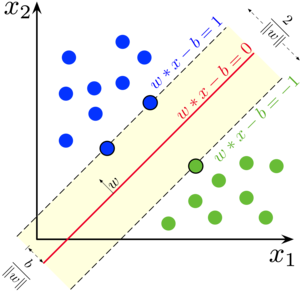

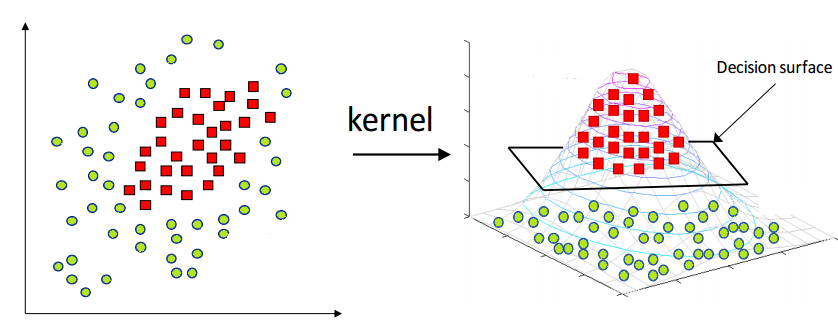


In [57]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

###### Step 5.3.1: Import SVM Module

In [58]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

###### Step 5.3.2: Predict X_test

In [59]:
y_pred = model_svc.predict(X_test)

In [60]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.7049180327868853
Precision Score:  0.6666666666666666
Recall Score:  0.875
F1 Score:  0.7567567567567568


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



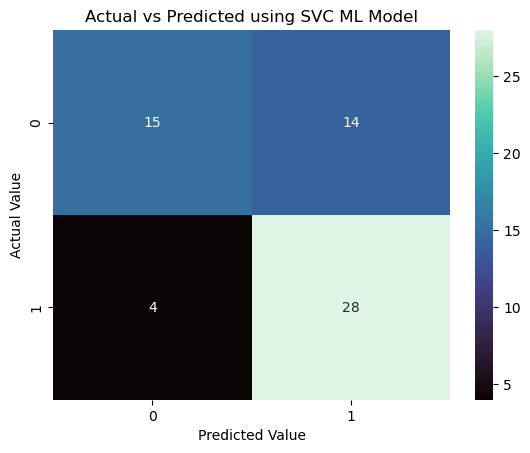

In [62]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [63]:
svm_score = accuracy_score(y_test,y_pred)

In [64]:
model_svc.score(X_test,y_test)

0.7049180327868853

#### Step 5.4: Decision Tree ML Model 

In [65]:
# 4 feature of ires
# sepel length 
# petal length 
# sepel width 
# petal width

# 3 Species
# vesricolor
# setosa
# vieginica

# Based on 4 feature

# petal width (cm) <= 0.8
# gini = 0.667
# samples = 120
# value = [40, 41, 39]
# class = versicolor

# petal length (cm) <= 4.75
# gini = 0.5
# samples = 80
# value = [0, 41, 39]
# class = versicolor

# gini = 0.0 
# Samples = 40
# value = 140,0,01
# class = setosa

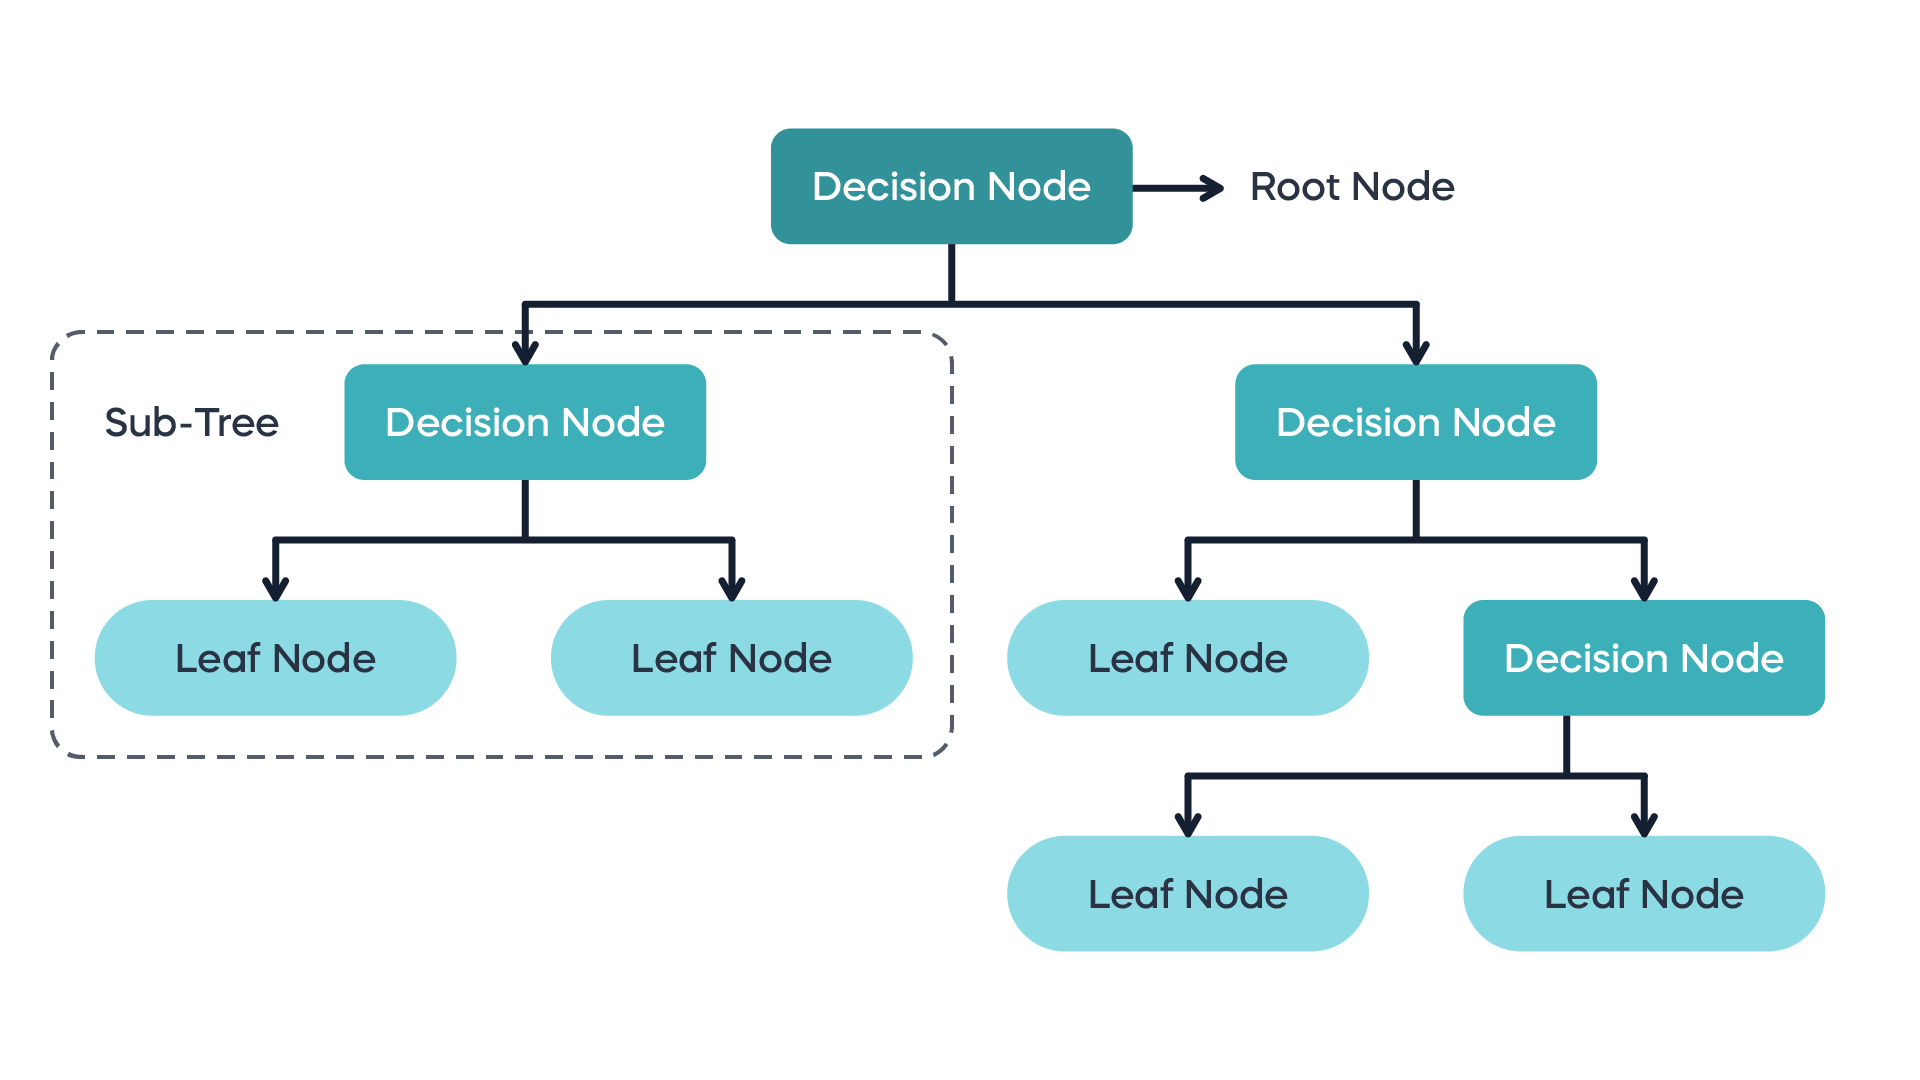

###### Step 5.4.1: Import Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

###### Step 5.4.2: Predict y_pred

In [68]:
y_pred = model_dt.predict(X_test)

In [69]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.8524590163934426

In [70]:
from sklearn.tree import plot_tree

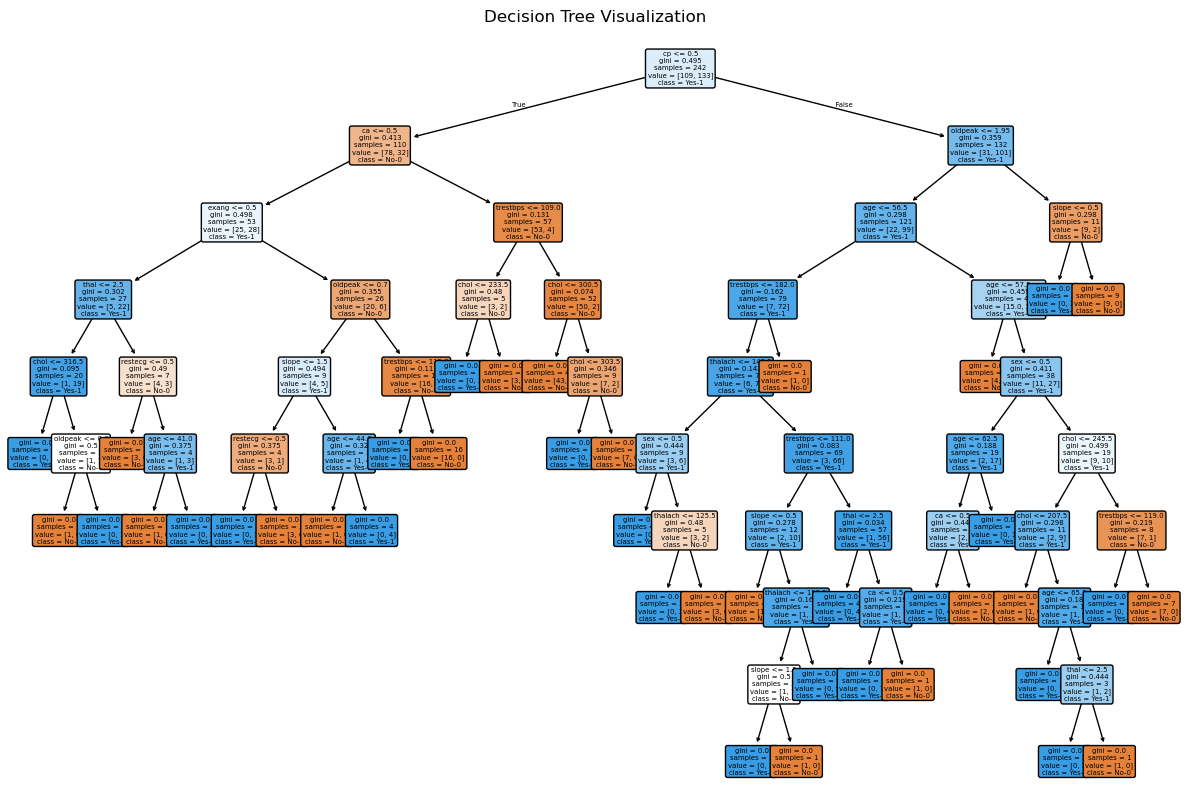

In [71]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

## Step 5.5: Ensemble Ml Model
- Bagging Technique 

- Boosting Technique

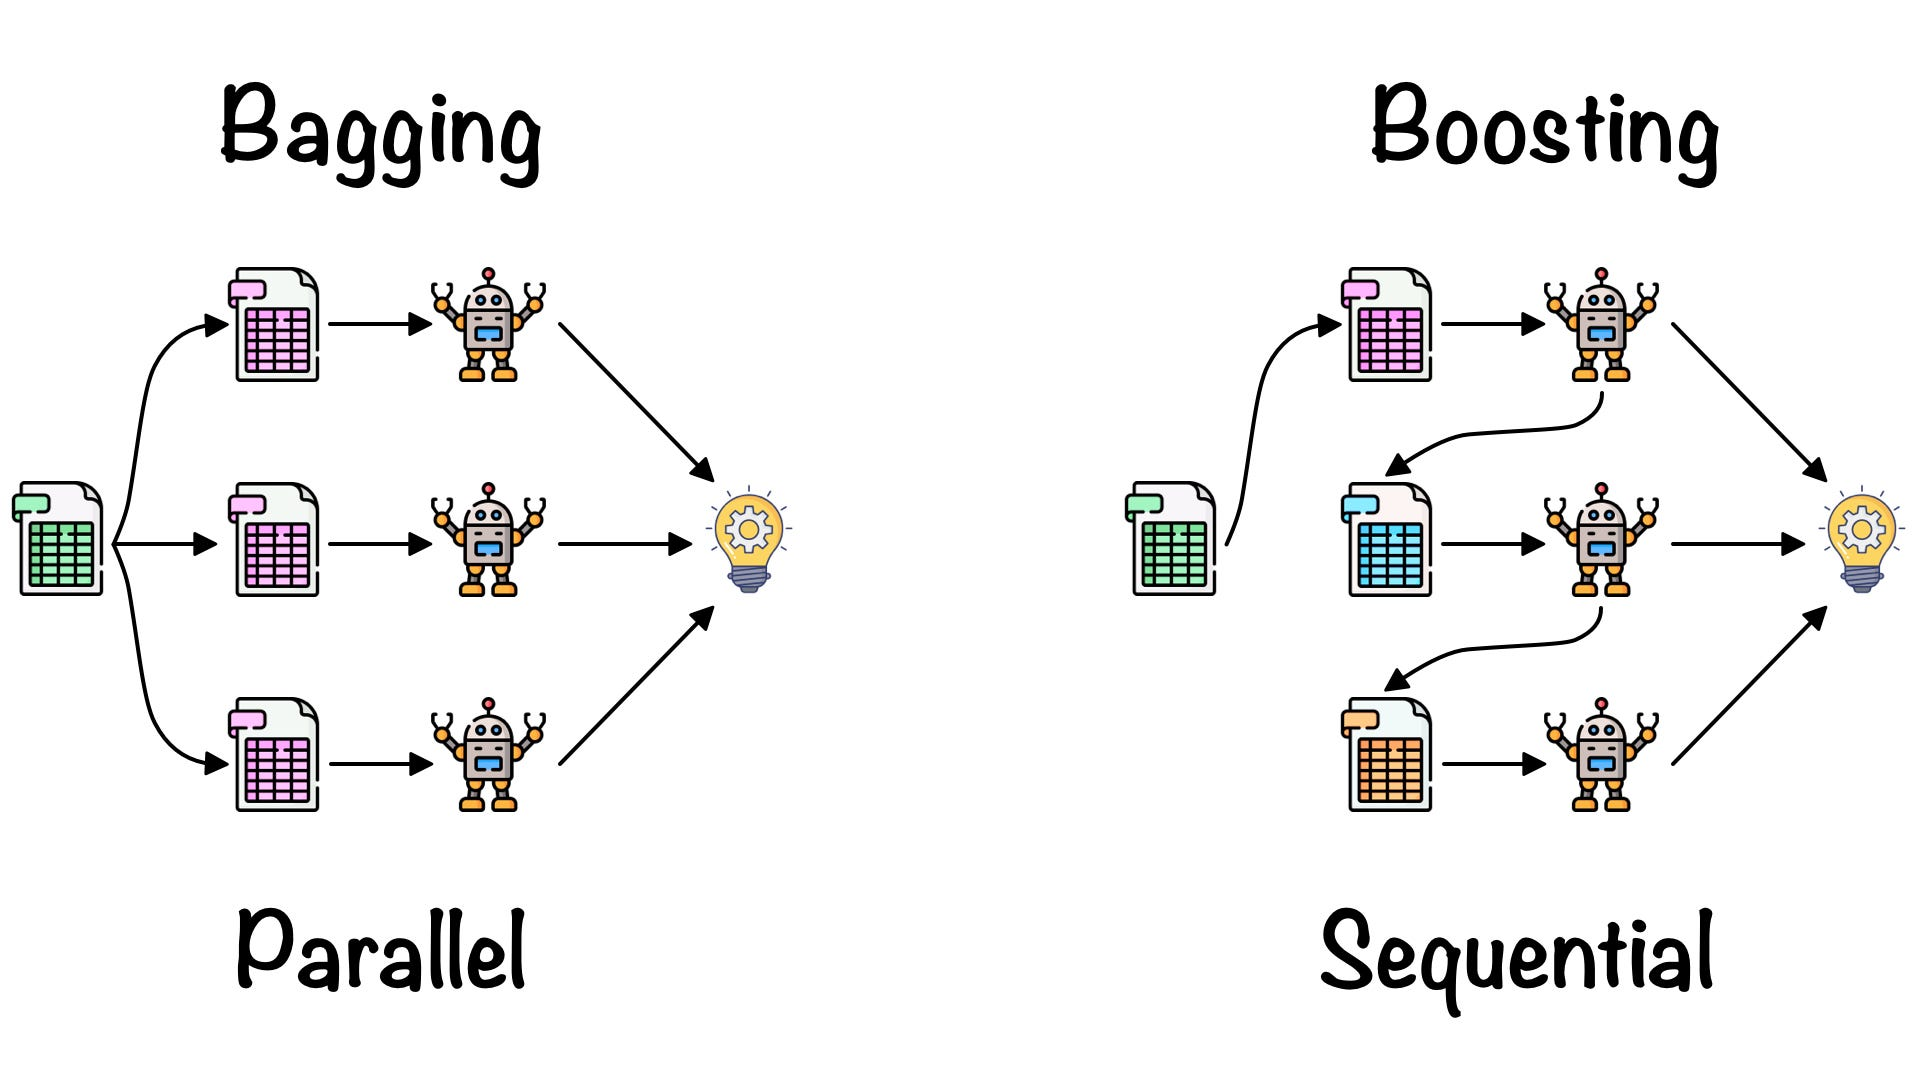

In [72]:
# Random Forest: Bags of Multiple Decision Tree()
# Default Trees = 100
# Bagging Technique (Ensemble)

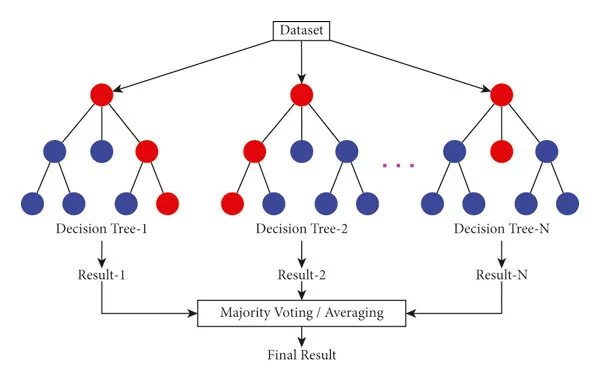

In [73]:
# Random Forest regression problem: Avg of Final value>> 2.2 + 2.4 + 2.5>> 2.36
# Random Forest Classification>> Binary/Multiclass classification >> Majority Voting

###### Step 5.5.2: Import Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model_rf = RandomForestClassifier(n_estimators=200)

model_rf.fit(X_train,y_train) #Learning

RandomForestClassifier(n_estimators=200)

###### Step 5.5.3 : y_pred prediction based on X_test

In [76]:
y_pred = model_rf.predict(X_test)

In [77]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8688524590163934
Precision Score:  0.8529411764705882
Recall Score:  0.90625
F1 Score:  0.8787878787878788


In [78]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.8688524590163934

###### Step 5.5.4: Confusion Matrix

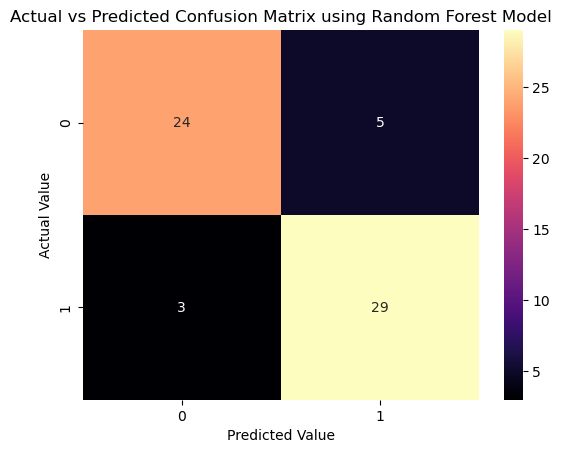

In [79]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using Random Forest Model')
sns.heatmap(cm,annot = True,cmap='magma')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

#### Step 5.6 :Ensemble Boosting Techinqe: Adabosst, Gradientboost, XGboost

In [80]:
# Adaboost: Adaptive Boosting 
# Gradientboost: GBM
# LBM: Gradientboost :LGBM
# XGboost: Extreme Gradiant Boosting:
# Catboost: Categorical : Textual Boosting

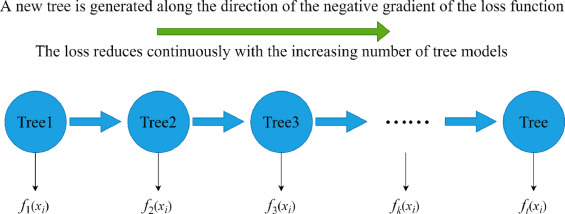

###### Step 5.6.1: Import XGboost ML Algorithm

In [81]:
# pip install xgboost

In [82]:
import xgboost
print('Done')

Done


In [83]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train) #NONE: Hyperparameters: Model fine tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
y_pred = model_xgb.predict(X_test)

In [85]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

#### Step 5.7: KNN: 

###### Step 5.7.1: Import KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
model_knn = KNeighborsClassifier(n_neighbors=14) # k= 14

model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [88]:
y_pred = model_knn.predict(X_test)

In [89]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



###### Step 5.3.4

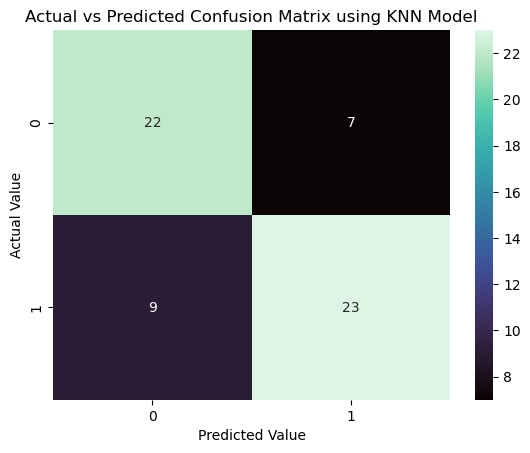

In [91]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using KNN Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

## Step 5.8: Artificial Neural network using Deep learning

In [92]:
# ML Works only on limited data 
# if Input Changes ML model fail(8 feature col ; 8)

In [93]:
# Deep learning: Dense(Deep) Neural Network: Trained on multiple
# Possibilities

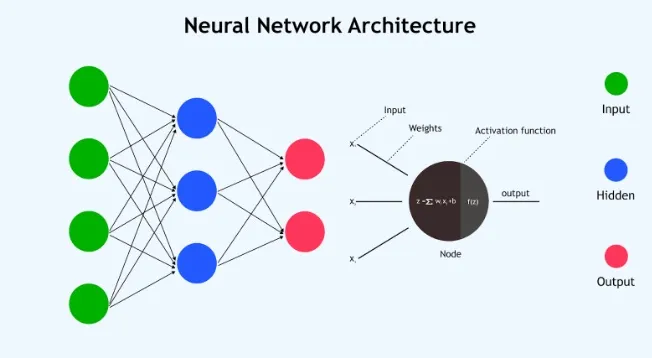

In [94]:
# keras tensor flow
# tensors: array

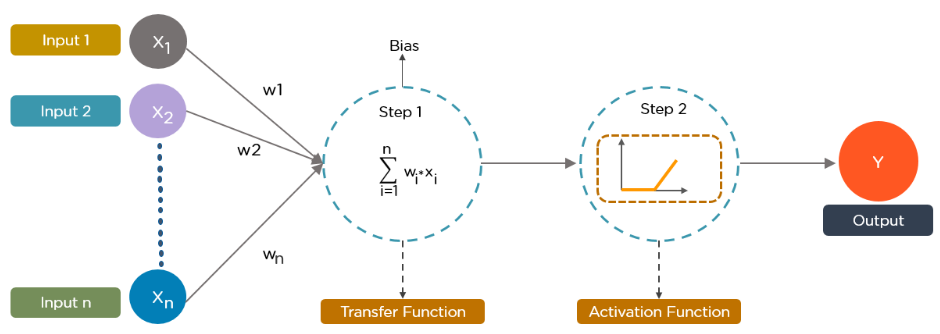

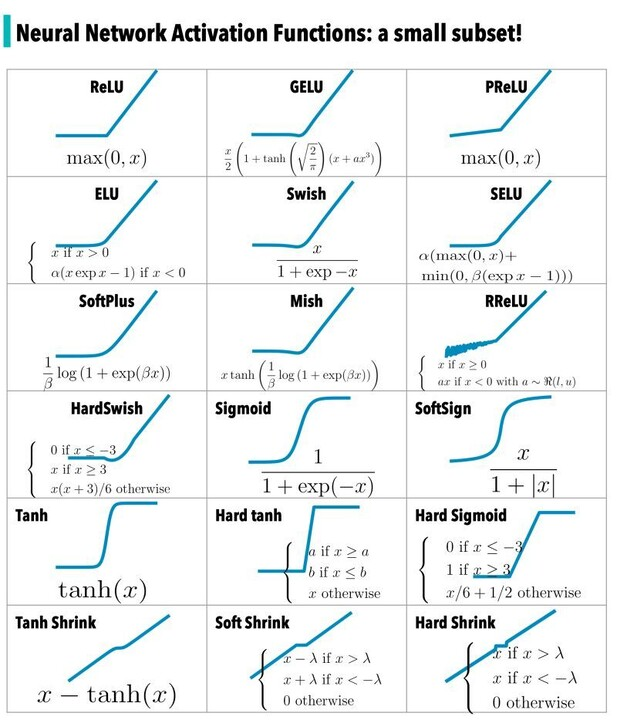

###### Step 5.8.1 ANN Model Creation 

In [95]:
# pip install keras

In [96]:
#pip install tensorflow

In [97]:
from keras.models import Sequential
from keras.layers import Dense

###### Step 5.8.2: Model Building

In [98]:
model = Sequential() # Step 1 Sequential model creation 
model.add(Dense(11,activation='relu',input_dim=13)) #Dense
model.add(Dense(1,activation='sigmoid')) #Out for put will be Neuron binary
model.compile(loss = 'binary_crossentropy', #loss to calculate model loss
              optimizer = 'adam', #optimizer to optimize model learing
              metrics = ['accuracy']) #metrics return accuracy score
print('Done')

Done


###### Step 5.8.3: Model Training

In [99]:
model.fit(X_train,y_train,epochs = 300)  # iteration during retraining: epochs=300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4504 - loss: 24.6465
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4504 - loss: 17.6964
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4463 - loss: 11.2315 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4628 - loss: 5.4192
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5537 - loss: 2.9209
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5992 - loss: 3.1547 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6033 - loss: 3.0742 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5868 - loss: 2.7498
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5413 - loss: 2.5918 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5289 - loss: 2.5940  
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5413 - loss: 2.5616  
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.562

###### Step 5.8.3: Pred y_value 

In [100]:
y_pred = model.predict(X_test)
y_pred = [round(i[0]) for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [101]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8688524590163934

## Step 6: All Model Comparision

In [102]:
all_model_score  = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


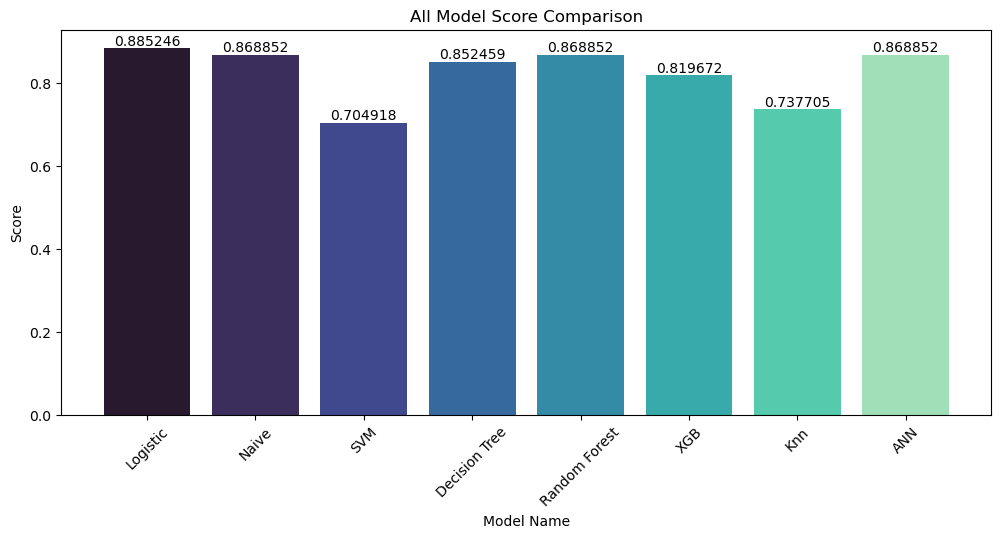

In [103]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

## Step 7: Best Model Save

In [104]:
# lr has highest score so the Final Model is Logistic Regression

In [105]:
# import pickle
# with open('heart_disease_pred.pkl','wb') as f:
#     pickle.dump(model_lr,f)
# print('Done')

## Step 8: Website Building and Localhost Deployment

In [106]:
import streamlit as st
print('Done')

Done


In [107]:
import os
os.getcwd()

'C:\\Users\\anuma\\Heart Disease Prediction'